In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

/kaggle/input/concrete-data/concrete_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/concrete-data/concrete_data.csv")

# Data Understanding

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.isnull()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [9]:

df.columns = [c.replace(' ', '_').lower() for c in df.columns]


print(df.columns)

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')


In [10]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


**Su/Çimento Oranı (Water/Cement Ratio)**

In [11]:
# En kritik özellik: Su / Çimento oranı
df['water_cement_ratio'] = df['water'] / df['cement']

In [12]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength,water_cement_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.966767


**Toplam Agrega (Total Aggregate)**

In [13]:
df['total_aggregate'] = df['coarse_aggregate'] + df['fine_aggregate']

In [14]:
df['total_aggregate'].head()

0    1716.0
1    1731.0
2    1526.0
3    1526.0
4    1803.9
Name: total_aggregate, dtype: float64

**Yaşın Logaritmik Dönüşümü (Log Transformation)**

In [15]:
df['log_age'] = np.log(df['age'] + 1)

In [16]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength,water_cement_ratio,total_aggregate,log_age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000,1716.0,3.367296
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000,1731.0,3.367296
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.685714,1526.0,5.602119
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.685714,1526.0,5.902633
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.966767,1803.9,5.888878


# Keşifsel Veri Analizi (EDA)

In [17]:
print(f"Veri Seti Boyutu: {df.shape}")
display(df.describe().T)

Veri Seti Boyutu: (1030, 12)


,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.000000,192.375000,272.900000,350.000000,540.000000
blast_furnace_slag,1030.0,73.895825,86.279342,0.000000,0.000000,22.000000,142.950000,359.400000
fly_ash,1030.0,54.188350,63.997004,0.000000,0.000000,0.000000,118.300000,200.100000
water,1030.0,181.567282,21.354219,121.800000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.204660,5.973841,0.000000,0.000000,6.400000,10.200000,32.200000
coarse_aggregate,1030.0,972.918932,77.753954,801.000000,932.000000,968.000000,1029.400000,1145.000000
fine_aggregate,1030.0,773.580485,80.175980,594.000000,730.950000,779.500000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817961,16.705742,2.330000,23.710000,34.445000,46.135000,82.600000
water_cement_ratio,1030.0,0.748266,0.314005,0.266893,0.533333,0.675349,0.935165,1.882353


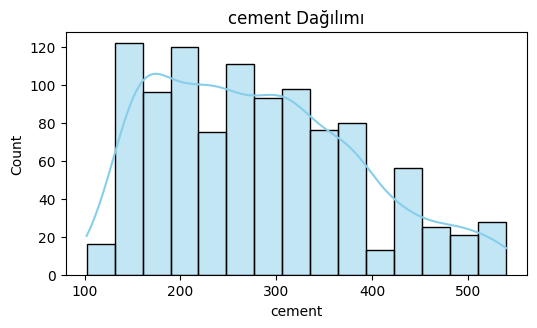

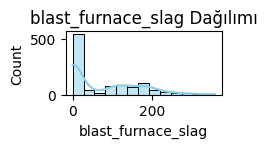

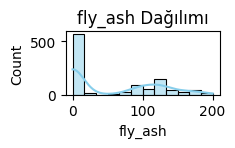

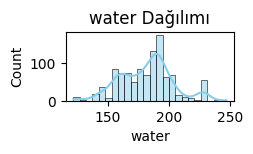

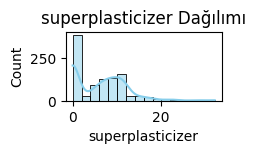

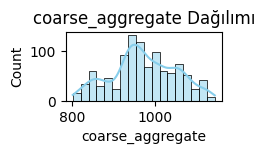

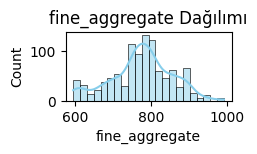

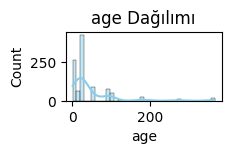

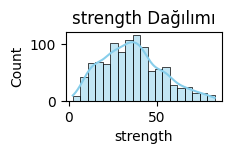

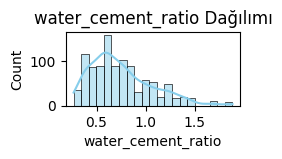

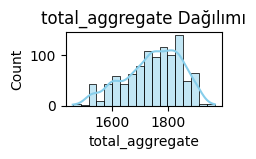

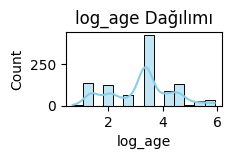

In [18]:

cols = df.columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(4, 3, i) 
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Dağılımı')
    plt.tight_layout()
    plt.show()

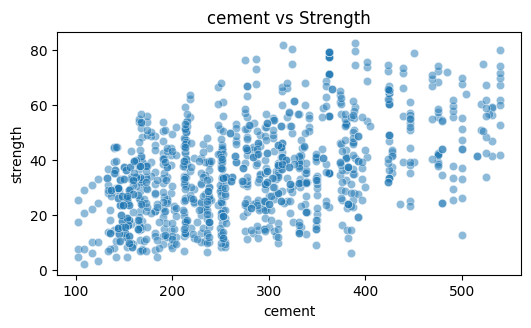

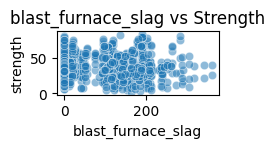

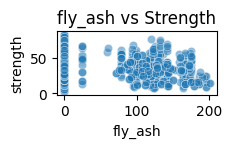

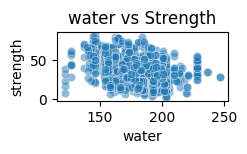

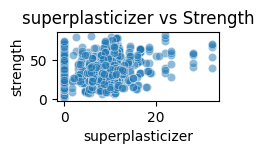

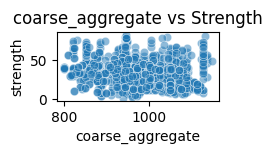

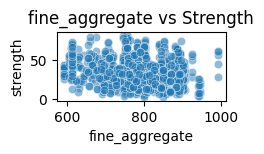

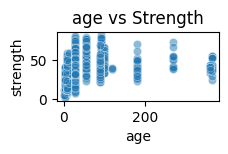

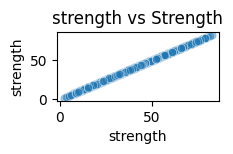

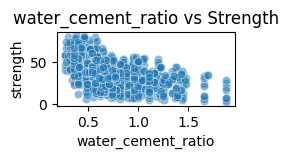

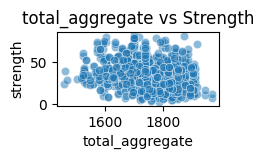

In [19]:

plt.figure(figsize=(15, 12))
for i, col in enumerate(cols[:-1], 1): 
    plt.subplot(4, 3, i)
    sns.scatterplot(data=df, x=col, y='strength', alpha=0.5)
    plt.title(f'{col} vs Strength')
    plt.tight_layout()
    plt.show()

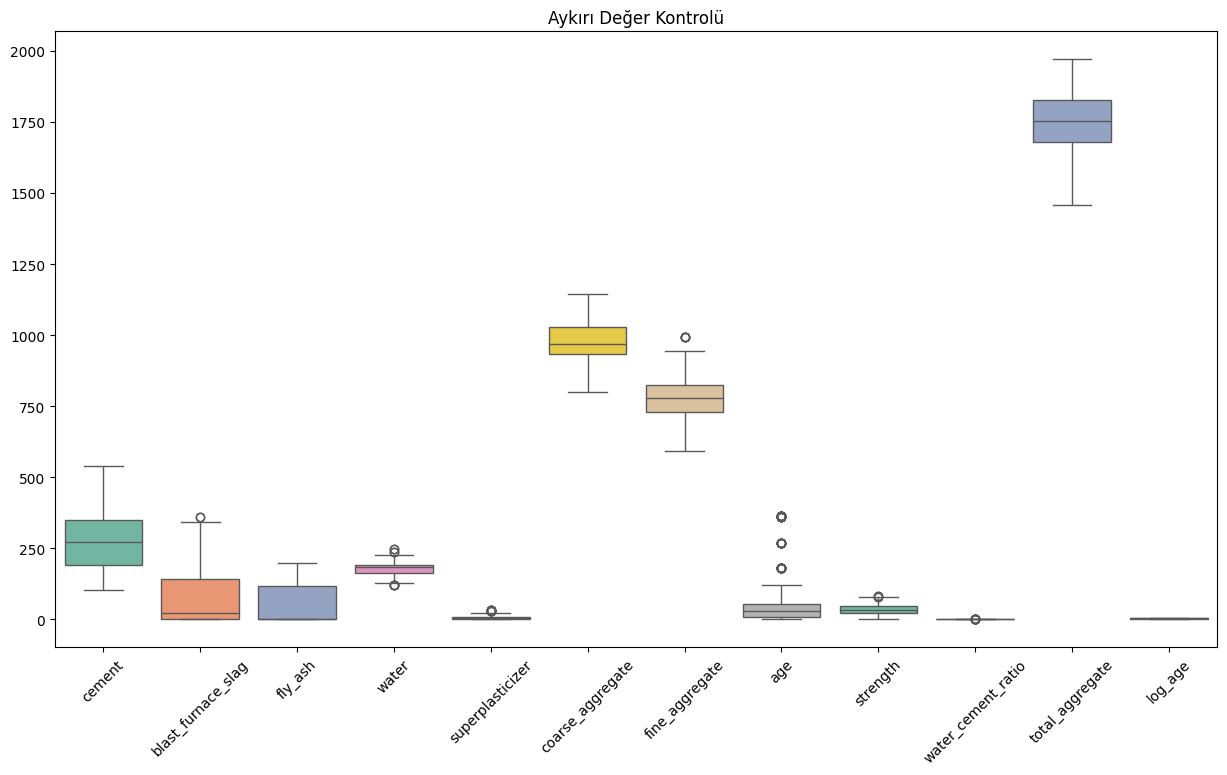

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title('Aykırı Değer Kontrolü')
plt.show()

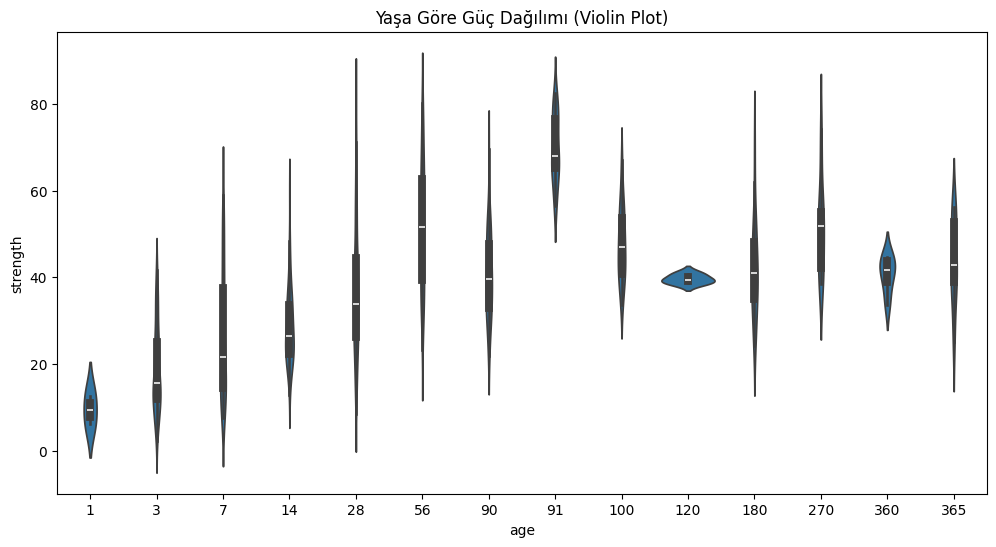

In [21]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='age', y='strength', data=df)
plt.title('Yaşa Göre Güç Dağılımı (Violin Plot)')
plt.show()

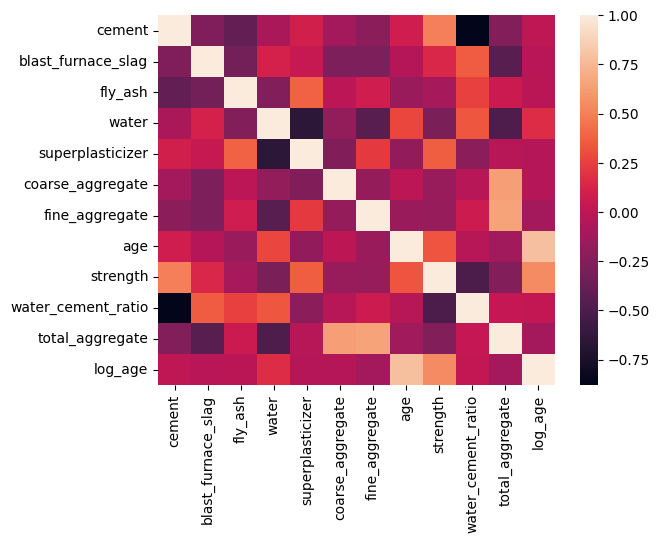

In [22]:
sns.heatmap(df.corr())
plt.show()

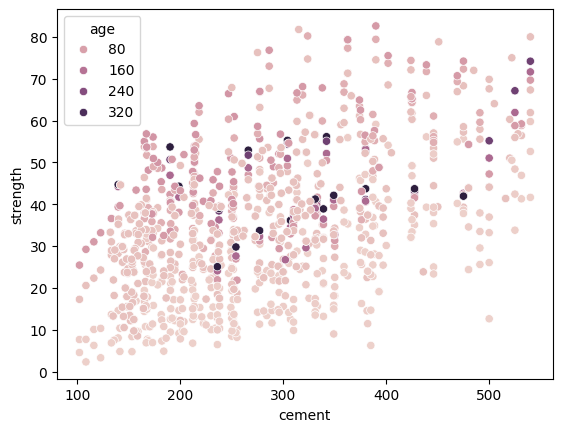

In [23]:
sns.scatterplot(data = df , x = "cement" , y = "strength" , hue = "age" )
plt.show()

# Preprocessing

In [24]:
X = df.drop("strength" , axis = 1)
y = df["strength"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 17)

# Model Evaluation

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
tree_reg1  = DecisionTreeRegressor(max_depth = 3)
tree_reg1.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=3)

In [29]:
y2 = y_train - tree_reg1.predict(X_train)

In [30]:
y2[:5]

964    3.989368
53     9.182508
566   -7.957492
422    4.765854
762   -7.287492
Name: strength, dtype: float64

In [31]:
tree_reg2 = DecisionTreeRegressor(max_depth = 4)
tree_reg2 .fit(X_train , y2)

DecisionTreeRegressor(max_depth=4)

In [32]:
y3 = y2 - tree_reg2.predict(X_train)
y3[:5]

964    7.329515
53     3.458887
566   -4.617345
422    1.346555
762   -3.542741
Name: strength, dtype: float64

In [33]:
tree_reg3 = DecisionTreeRegressor(max_depth = 4)
tree_reg3.fit(X_train , y3)

DecisionTreeRegressor(max_depth=4)

In [34]:
y4 = y3 - tree_reg3.predict(X_train)
y4[:5]

964    5.131491
53     4.189573
566   -6.815369
422    2.077241
762   -7.213296
Name: strength, dtype: float64

In [35]:

y_pred = sum (tree.predict(X_test) for tree in (tree_reg1 , tree_reg2 , tree_reg3))

In [36]:
y_pred

array([40.90433137, 31.49795469, 35.53205521, 22.56870949, 35.53205521,
       72.67508863, 32.89012276, 25.4060052 , 31.49795469, 58.99118475,
       75.60379906, 52.8053943 , 46.02274736, 49.40166823, 17.48416445,
       36.01226618, 28.6759331 , 35.53205521, 48.95145779, 21.80979854,
       24.73850897, 17.48416445, 76.04948356, 35.53205521, 59.76979093,
       22.67160173, 52.27335279, 58.99118475, 42.32708007, 50.42398861,
       29.73275902,  8.06557235, 31.61102493, 62.18439648, 42.21999971,
       45.85346848, 31.49795469, 35.93665903, 35.53205521, 45.85346848,
       46.02274736, 52.8053943 , 45.85346848, 17.48416445, 72.67508863,
       46.02274736, 25.4060052 , 39.93329646, 48.66977148, 58.99118475,
       48.66977148, 18.64767921, 48.95145779,  0.07952448,  0.07952448,
       37.81875847, 23.62497707, 35.53205521, 48.66977148, 11.98660262,
       15.31991686, 69.91518348, 40.42387003, 35.53205521, 39.38599172,
       38.86536945, 35.93665903,  8.06557235,  0.07952448, 46.02

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test , y_pred)

0.7344868332288373

In [39]:
tree_reg4 = DecisionTreeRegressor(max_depth = 4)

In [40]:
tree_reg4.fit(X_train , y4)

DecisionTreeRegressor(max_depth=4)

In [41]:
y_pred = sum (tree.predict(X_test) for tree in (tree_reg1 , tree_reg2 , tree_reg3 , tree_reg4))

In [42]:
r2_score(y_test , y_pred)

0.7665033194764294

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
gbr = GradientBoostingRegressor(n_estimators = 3 , max_depth = 3  , learning_rate = 0.1)

In [45]:
gbr.fit(X_train , y_train)

GradientBoostingRegressor(n_estimators=3)

In [46]:
y_pred = gbr.predict(X_test)
r2_score(y_test , y_pred)

0.3008986914843761

In [47]:
gbr = GradientBoostingRegressor(n_estimators = 100 , max_depth = 3  , learning_rate = 0.1)
gbr.fit(X_train , y_train)
y_pred = gbr.predict(X_test)
r2_score(y_test , y_pred)

0.9041761309853046

In [48]:
params = {
    "n_estimators" : [100 ,150 ,200],
    "max_depth" : [3 , 4 , 5],
    "loss" : ["squared_error" , "absolute_error" , "huber" , "quantile"],
    "learning_rate" : [0.01 , 0.1 , 0.5]
}

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
rscv = RandomizedSearchCV(estimator = GradientBoostingRegressor() , param_distributions = params , cv = 5)

In [51]:
rscv.fit(X_train , y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 150, 200]})

In [52]:
rscv.best_params_

{'n_estimators': 150,
 'max_depth': 3,
 'loss': 'squared_error',
 'learning_rate': 0.1}

In [53]:
y_pred = rscv.predict(X_test)
r2_score(y_test , y_pred)

0.9131625601671461